# **Hotel booking Cancellation Prediction :**

## In this notebook, we are going to see if we can we predict hotel booking cancellations in advance in order to reduce revenue loss and optimize overbooking and pricing strategies ?

#### To answer our question, we are going to analyze and do some machine learning algorithms on a large hotel booking dataset containing detailed information about customer characteristics, reservation details, and booking outcomes.

## 1. Collect :



### 1.1 Import librairies :


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

In [14]:
#1. IMPORTING LIBRARIES WE WILL USE LATER

#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning :
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


### 1.2 Load the data





In [15]:
#1. Import  the datasets
hotel_df=pd.read_csv("hotel_bookings.csv")

In [3]:
#See the data shape since they need top have the same number of rows
print("Rows * Columns :",hotel_df.shape)


Rows * Columns : (119390, 32)


## 2. Clean :


###2.1 Assessing Data Quality :

Before EDA, let's :
* Check for missing values

* Check data types

*  Check for duplicates

*  Validate date ranges

*  Check for outliers

* Check data consistency



In [4]:
#Look at the data set to inspect
hotel_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#have a quick looak at the summary statistics
print("Summary Statistics")
display(hotel_df.describe(include='all'))



Summary Statistics


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


We notice that there is a negative value as a minimum for the adr, which represents the average daily rate of a hotel

In [6]:
#Check for data type of Each colum

hotel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* reservation_status_date is type object but it's actually a date
* arrival_date_month is written in letters, so we can change it in numbers

In [16]:
#count haw many NaN For each column
hotel_df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [17]:
#check if there is duplicates
hotel_df.duplicated().sum()

np.int64(31994)

In [18]:
#adults and babies and childrens can't be null at the same time, if it's the case we remove it :
holter_df=hotel_df[(hotel_df.children == 0) & (hotel_df.adults == 0) & (hotel_df.babies == 0)]


### 2.2 Drop Duplicates

In [19]:
#function that removes duplicates and reset index
def remove_duplicates(df):
    df = df.drop_duplicates().reset_index(drop=True)
    return df

hotel_df=remove_duplicates(hotel_df)


###2.3 Handling Missing Values :

In [20]:
#Convert some features first
#convert reservation status date to date format
def convert_reservation_status_to_date(df):
  df['reservation_status_date'] = pd.to_datetime(
      df['reservation_status_date'],
      format='%Y-%m-%d',
      errors='coerce'
  )
  return df

hotel_df=convert_reservation_status_to_date(hotel_df)


In [13]:
#First of all, since we have negative values which can't be possible
#So we assume that it's just an input error and it's just postive value Instead
def convert_negative_values(df):
  numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
  for col in numeric_cols:
    df[col] = df[col].apply(lambda x: abs(x) if pd.notnull(x) else x)
  return df

hotel_df=convert_negative_values(hotel_df)

In [21]:
#Handle NaN values : replace them with 0 because
# NaN value for Agent means : direct booking
# NaN value for company means : not a company trip
# Nan value for country means we don't have the information of the origin of the customer
# Children, we assume NaN values mean The adults come without children

def handle_missing_with_zero(df):
  columns_=["company","agent","country","children"]
  for col in columns_:
    df[col] = df[col].fillna(0)
  return df

hotel_df = handle_missing_with_zero(hotel_df)



## 3. EDA:

#### Where do the most ofcustomers come from ?

In [22]:
top_countries = hotel_df['country'].value_counts().head(10)

print("Top 10 countries by number of guests:")
print(top_countries)

Top 10 countries by number of guests:
country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64


### Cancellation overview

In [23]:
#Define plot style for later
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
#See the cancellation percentage in our dataset
cancellation_rate = hotel_df['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")
print(f"Total Bookings: {len(hotel_df):,}")
print(f"Canceled: {hotel_df['is_canceled'].sum():,}")
print(f"Not Canceled: {(hotel_df['is_canceled'] == 0).sum():,}")


Overall Cancellation Rate: 27.49%
Total Bookings: 87,396
Canceled: 24,025
Not Canceled: 63,371


/tmp/ipython-input-415778046.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotel_df, x='is_canceled', palette=colors, ax=axes[1])
/tmp/ipython-input-415778046.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Canceled', 'Canceled'])


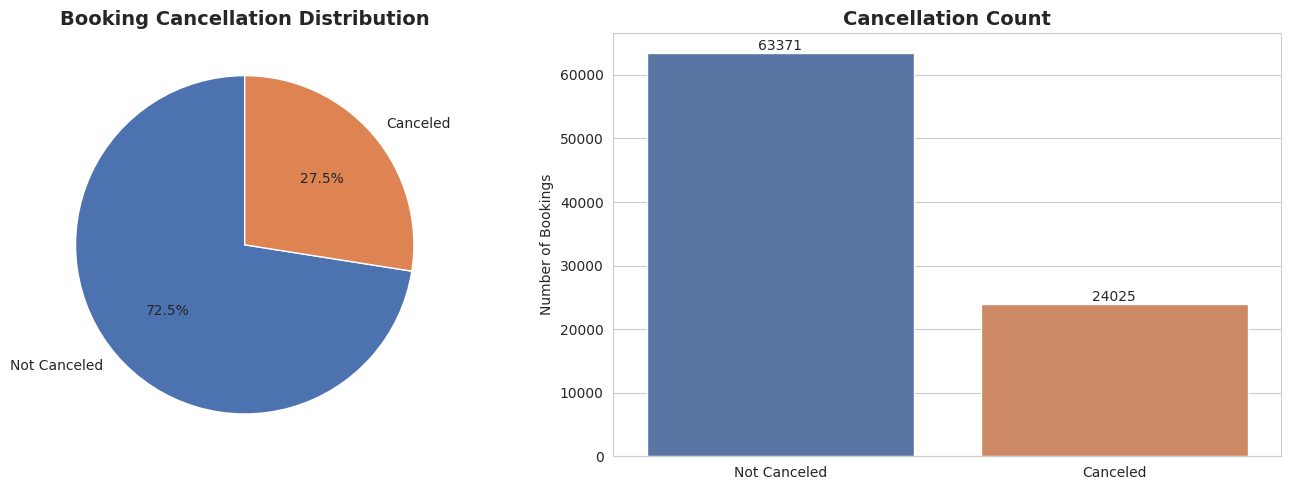

In [24]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#4C72B0', '#DD8452']
labels = ['Not Canceled', 'Canceled']
sizes = hotel_df['is_canceled'].value_counts()
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Booking Cancellation Distribution', fontsize=14, fontweight='bold')
sns.countplot(data=hotel_df, x='is_canceled', palette=colors, ax=axes[1])
axes[1].set_xticklabels(['Not Canceled', 'Canceled'])
axes[1].set_title('Cancellation Count', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Bookings')
axes[1].set_xlabel('')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

### Lead Time Analysis

**Lead time definition :** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

In [25]:
print("Lead Time Statistics:")
print(hotel_df.groupby('is_canceled')['lead_time'].describe())

Lead Time Statistics:
               count        mean        std  min   25%   50%    75%    max
is_canceled                                                               
0            63371.0   70.099588  81.629723  0.0   7.0  38.0  110.0  737.0
1            24025.0  105.719251  91.877339  0.0  32.0  80.0  158.0  629.0


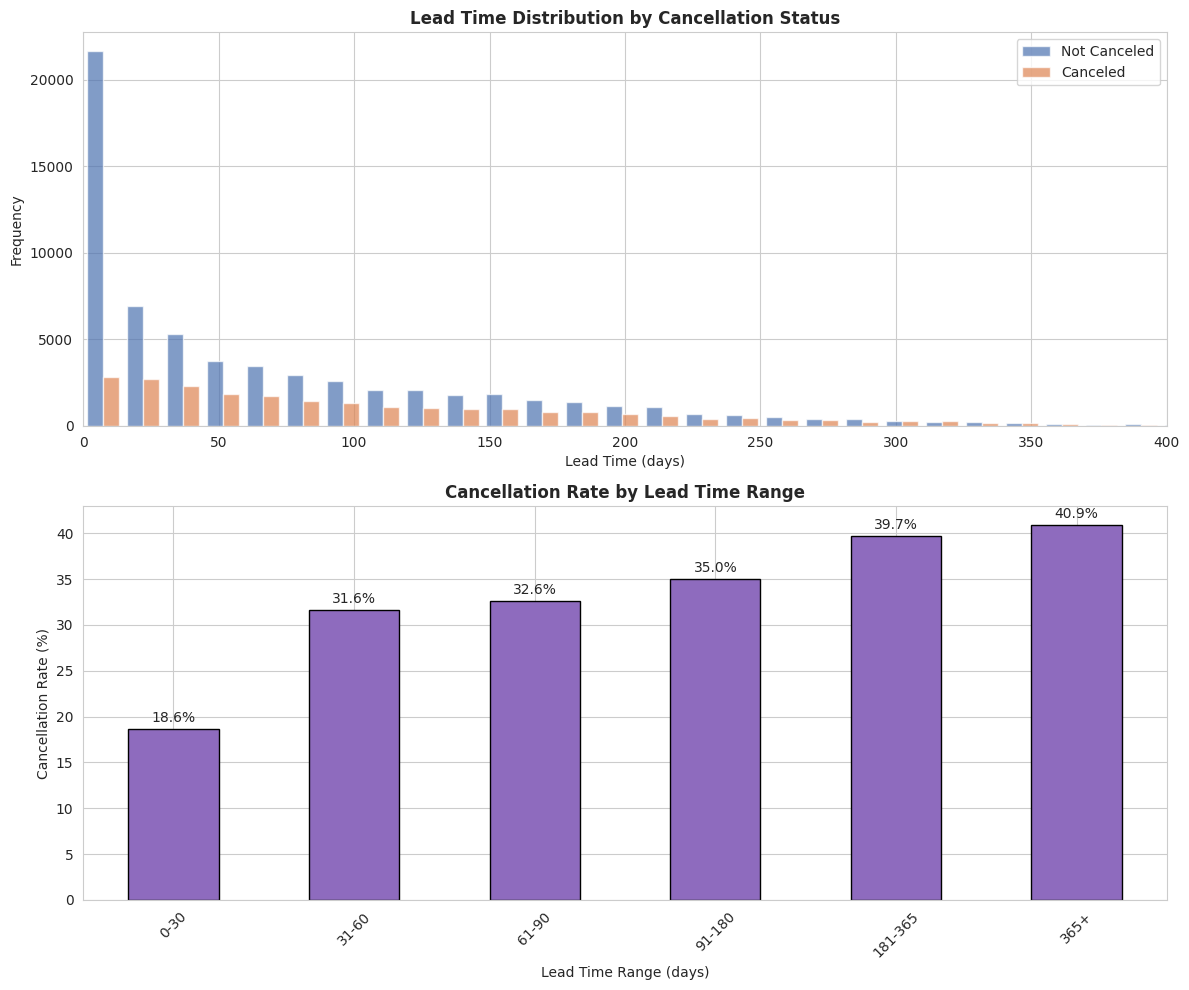

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

#Lead time distribution (histogram)
axes[0].hist(
    [hotel_df[hotel_df['is_canceled'] == 0]['lead_time'],
     hotel_df[hotel_df['is_canceled'] == 1]['lead_time']],
    bins=50,
    label=['Not Canceled', 'Canceled'],
    color=['#4C72B0', '#DD8452'],
    alpha=0.7
)
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Lead Time Distribution by Cancellation Status', fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, 400)

#Cancellation rate by lead time range
lead_bins = [0, 30, 60, 90, 180, 365, 800]
lead_labels = ['0-30', '31-60', '61-90', '91-180', '181-365', '365+']

hotel_df['lead_time_bin'] = pd.cut(
    hotel_df['lead_time'], bins=lead_bins, labels=lead_labels
)

lead_cancel = (
    hotel_df.groupby('lead_time_bin', observed=True)['is_canceled']
    .mean() * 100
)

lead_cancel.plot(
    kind='bar',
    ax=axes[1],
    color='#8E6BBE',
    edgecolor='black'
)

axes[1].set_title('Cancellation Rate by Lead Time Range', fontweight='bold')
axes[1].set_ylabel('Cancellation Rate (%)')
axes[1].set_xlabel('Lead Time Range (days)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


### What are the type of customers ?

In [27]:
print("CUSTOMER TYPE PATTERNS")

customer_cancel = hotel_df.groupby('customer_type')['is_canceled'].agg(['sum', 'count', 'mean'])
customer_cancel['cancel_rate'] = customer_cancel['mean'] * 100
print(customer_cancel.sort_values('cancel_rate', ascending=False))


CUSTOMER TYPE PATTERNS
                   sum  count      mean  cancel_rate
customer_type                                       
Transient        21672  71986  0.301059    30.105854
Contract           512   3139  0.163109    16.310927
Transient-Party   1787  11727  0.152383    15.238339
Group               54    544  0.099265     9.926471


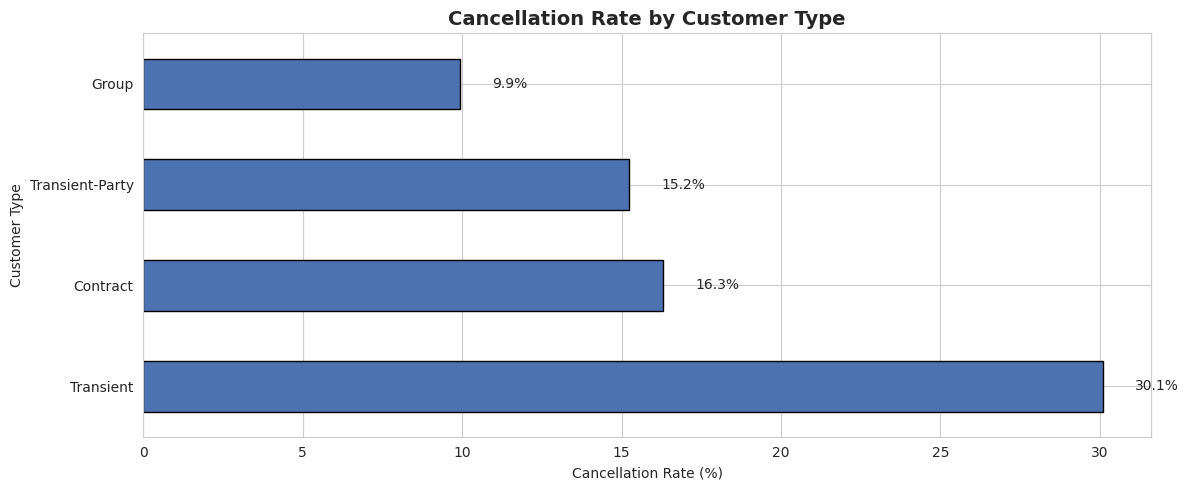

In [28]:
plt.figure(figsize=(12, 5))
customer_rates = hotel_df.groupby('customer_type')['is_canceled'].mean() * 100
customer_rates.sort_values(ascending=False).plot(kind='barh', color='#4C72B0', edgecolor='black')
plt.title('Cancellation Rate by Customer Type', fontsize=14, fontweight='bold')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Customer Type')
for i, v in enumerate(customer_rates.sort_values(ascending=False).values):
    plt.text(v + 1, i, f'{v:.1f}%', va='center')
plt.tight_layout()
plt.show()

### Deposit Type

In [29]:
print("DEPOSIT TYPE IMPACT")

deposit_cancel = hotel_df.groupby('deposit_type')['is_canceled'].agg(['sum', 'count', 'mean'])
deposit_cancel['cancel_rate'] = deposit_cancel['mean'] * 100
print(deposit_cancel.sort_values('cancel_rate', ascending=False))



DEPOSIT TYPE IMPACT
                sum  count      mean  cancel_rate
deposit_type                                     
Non Refund      983   1038  0.947013    94.701349
No Deposit    23016  86251  0.266849    26.684908
Refundable       26    107  0.242991    24.299065


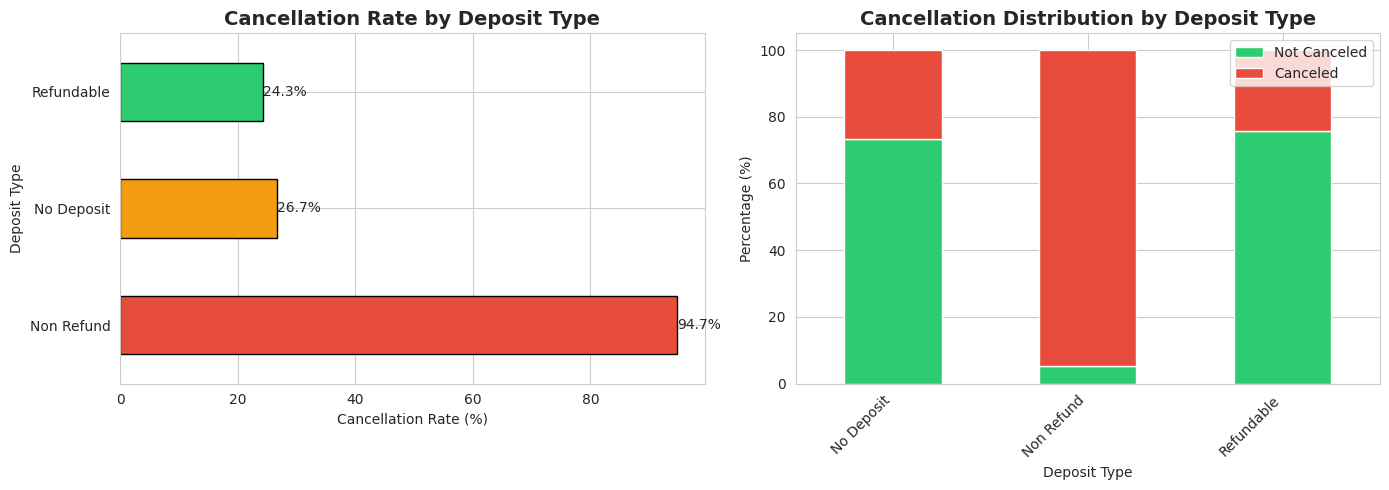

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

deposit_rates = hotel_df.groupby('deposit_type')['is_canceled'].mean() * 100
colors_deposit = ['#e74c3c', '#f39c12', '#2ecc71']
deposit_rates.sort_values(ascending=False).plot(kind='barh', ax=axes[0],color=colors_deposit, edgecolor='black')
axes[0].set_title('Cancellation Rate by Deposit Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cancellation Rate (%)')
axes[0].set_ylabel('Deposit Type')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%')

deposit_status = pd.crosstab(hotel_df['deposit_type'], hotel_df['is_canceled'], normalize='index') * 100
deposit_status.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Cancellation Distribution by Deposit Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Deposit Type')
axes[1].legend(['Not Canceled', 'Canceled'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Does the price of booking vary per month ?

Average ADR by Month:
arrival_date_month
April        103.612589
August       150.876120
December      81.450226
February      74.692033
January       70.050742
July         135.542014
June         119.750120
March         81.609523
May          111.195703
November      72.754460
October       90.152518
September    112.081263
Name: adr, dtype: float64


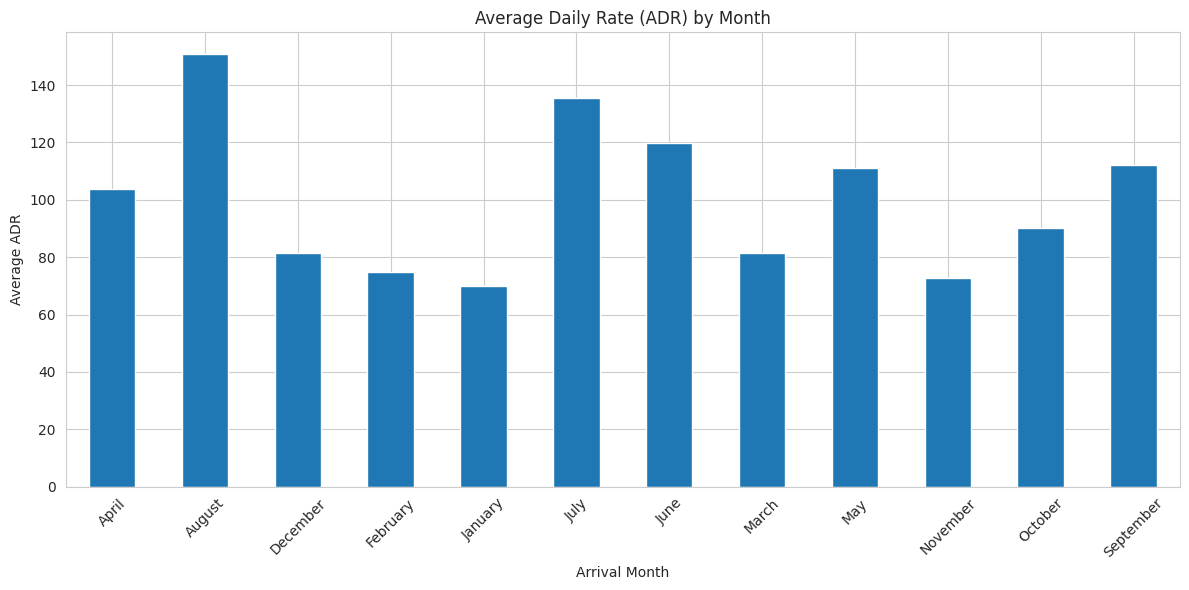

In [31]:
#ADR by month (seasonality)
# Mean ADR by month
monthly_adr = hotel_df.groupby('arrival_date_month')['adr'].mean()

print("Average ADR by Month:")
print(monthly_adr)

# Bar plot
plt.figure()
monthly_adr.plot(kind='bar')
plt.title("Average Daily Rate (ADR) by Month")
plt.xlabel("Arrival Month")
plt.ylabel("Average ADR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average ADR by Year:
arrival_date_year
2015     92.160752
2016    101.538903
2017    118.710660
Name: adr, dtype: float64


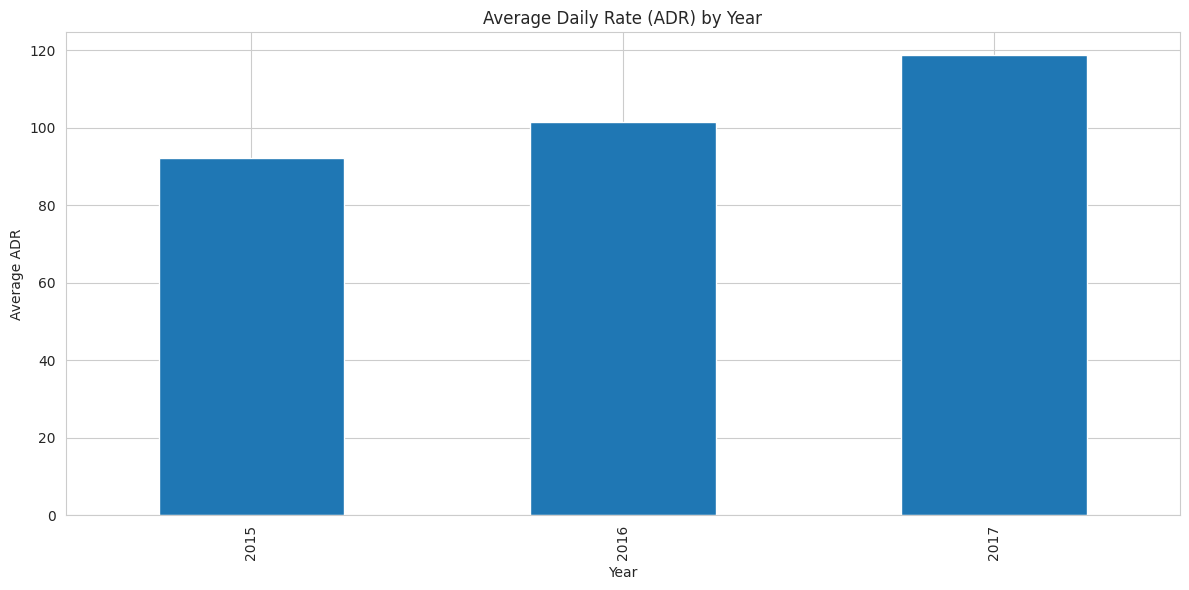

In [32]:
#ADR by year
yearly_adr = hotel_df.groupby('arrival_date_year')['adr'].mean()

print("Average ADR by Year:")
print(yearly_adr)

plt.figure()
yearly_adr.plot(kind='bar')
plt.title("Average Daily Rate (ADR) by Year")
plt.xlabel("Year")
plt.ylabel("Average ADR")
plt.tight_layout()
plt.show()

##4. Supervized Learning :

###Transforming the features for the ML :

Feature engineering : Data pre-processing for the ML

*   We divide Categorical Columns and non categorica columns




In [38]:
#Make a copy of the original dataset
new_df=hotel_df.copy()

#Create room type mismatch feature BEFORE dropping assigned_room_type
new_df['room_type_mismatch'] = (new_df['reserved_room_type'] != new_df['assigned_room_type']).astype(int)

# For Numerical Columns, Agent and company represent the ID
new_df['is_agent_booking'] = np.where(new_df['agent'] != 0, 1, 0)#1 if the it's direct booking otherwise 0
new_df['is_corporate'] = np.where(new_df['company'] != 0, 1, 0) #1 if the it's work/ corporate booking otherwise 0

# Ensure is_repeated_guest is binary
new_df['is_repeated_guest'] = new_df['is_repeated_guest'].astype(int)


#Drop agent and company ID
#new_df = new_df.drop(columns=['agent', 'company'])

In [56]:
#drop unecessary columns

def drop_columns(df):
  useless_columns = [
      'arrival_date_week_number', # Redundant Month captures seasonality
      'arrival_date_day_of_month',#too granular Month/season more predictive

      'rereservation_status',
      'assigned_room_type', #keep only reserved and mismatch flag

      'booking_changes',
      'days_in_waiting_list',

      'reservation_status',#leakage
      'reservation_status_date',

      'country',
      'lead_time_bin' #columns we created earlier for the EDA plot
  ]


  df = df.drop(columns=useless_columns, errors='ignore')

  return df





In [57]:
#categorical columns :
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)



Index(['lead_time_bin'], dtype='object')


In [58]:
for col in categorical_cols:
  print(f"\nUnique values in column '{col}':")
  print(new_df[col].unique())



Unique values in column 'lead_time_bin':
['181-365', '365+', '0-30', NaN, '61-90', '31-60', '91-180']
Categories (6, object): ['0-30' < '31-60' < '61-90' < '91-180' < '181-365' < '365+']


In [59]:
#categorical variables
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_variables(df):

    #use LabelEncoder
    le_hotel = LabelEncoder()
    df['hotel'] = le_hotel.fit_transform(df['hotel'].astype(str).str.strip())
    #arrival_Month date we transform it to numbers
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    if 'arrival_date_month' in df.columns:
        df['arrival_date_month'] = (df['arrival_date_month'].astype(str).str.strip().map(month_mapping))

    #better than LabelEncoder for Later ML use
    one_hot_columns = [
        'arrival_date_month',
        'meal',
        'market_segment',
        'distribution_channel',
        'reserved_room_type',
        'deposit_type',
        'customer_type'
    ]

    # Keep only columns that actually exist in df
    existing_one_hot = [col for col in one_hot_columns if col in df.columns]

    if existing_one_hot:
        for col in existing_one_hot:
            df[col] = df[col].astype(str).str.strip()

        df = pd.get_dummies(df,columns=existing_one_hot,drop_first=True,dtype=int)

    return df




Apply these transformations to the dataset once  :

In [60]:
#Call columns
new_df = drop_columns(new_df)

new_df = encode_categorical_variables(new_df)



In [61]:
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,342,2015,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,737,2015,0,0,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,7,2015,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,13,2015,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,14,2015,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
#Verify if we still have categorical columns
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)



Index([], dtype='object')


In [63]:
from sklearn.preprocessing import StandardScaler


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

X = new_df.drop('is_canceled', axis=1)
y = new_df['is_canceled']

# Absolute counts
class_counts = y.value_counts()
print("Class counts:")
print(class_counts)

# Percentages
class_percentages = y.value_counts(normalize=True) * 100
print("\nClass percentages:")
print(class_percentages)


Class counts:
is_canceled
0    63371
1    24025
Name: count, dtype: int64

Class percentages:
is_canceled
0    72.510184
1    27.489816
Name: proportion, dtype: float64


##### Since we have imbalanced dataset, we will stratify our data in the training

In [65]:
# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)


print(f"Training set: {X_train.shape[0]} ")
print(f"Test set: {X_test.shape[0]}")


Training set: 69916 
Test set: 17480


In [66]:
# Scale features Since we do distant based algorithm (important for Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(" Feature scaling completed")


 Feature scaling completed


In [67]:
#function that we will call for every model
def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)

    # Some models (like SVC without probability=True) don't have predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    else:
        roc = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    if roc is not None:
        print("ROC-AUC  :", roc)
    else:
        print("ROC-AUC  : (not available for this model)")
    print("\nConfusion Matrix:\n", cm)

###4.1 Logistic Regression



In [68]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced') #we add class weight balanced

log_reg.fit(X_train_scaled, y_train)

evaluate_model(log_reg, X_test_scaled, y_test)


Accuracy : 0.7034897025171625
Precision: 0.47609410574247407
Recall   : 0.7833506763787721
F1-score : 0.5922429391865314
ROC-AUC  : 0.8145521902521822

Confusion Matrix:
 [[8533 4142]
 [1041 3764]]


###4.2 KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled, y_train)

print("K-Nearest Neighbors (k=10)")
evaluate_model(knn, X_test_scaled, y_test)


K-Nearest Neighbors (k=10)
Accuracy : 0.7869565217391304
Precision: 0.668222844693433
Recall   : 0.44682622268470346
F1-score : 0.5355450236966824
ROC-AUC  : 0.8066489090300824

Confusion Matrix:
 [[11609  1066]
 [ 2658  2147]]


###4.3 Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=8,
    random_state=42
)

dt.fit(X_train_scaled, y_train)

print("Decision Tree")
evaluate_model(dt, X_test_scaled, y_test)


Decision Tree
Accuracy : 0.8009153318077803
Precision: 0.7333568157802043
Recall   : 0.43329864724245576
F1-score : 0.5447409733124019
ROC-AUC  : 0.8260154548085391

Confusion Matrix:
 [[11918   757]
 [ 2723  2082]]


###4.4 Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

print("Random Forest")
evaluate_model(rf, X_test_scaled, y_test)


Random Forest
Accuracy : 0.8036613272311213
Precision: 0.7568275346053124
Recall   : 0.4210197710718002
F1-score : 0.5410537576892217
ROC-AUC  : 0.8416913676787207

Confusion Matrix:
 [[12025   650]
 [ 2782  2023]]


### 4.5 Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_scaled, y_train)

print("Gradient Boosting")
evaluate_model(gb, X_test_scaled, y_test)


Gradient Boosting
Accuracy : 0.809096109839817
Precision: 0.7331639135959339
Recall   : 0.48033298647242456
F1-score : 0.5804099082107381
ROC-AUC  : 0.8457974455438635

Confusion Matrix:
 [[11835   840]
 [ 2497  2308]]


###4.6 Model Comparaison

In [73]:
models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

rows = []

for name, mdl in models.items():
    y_pred = mdl.predict(X_test_scaled)

    if hasattr(mdl, "predict_proba"):
        y_proba = mdl.predict_proba(X_test_scaled)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    else:
        roc = None

    rows.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc
    })

results_df = pd.DataFrame(rows)
results_df



,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.703490,0.476094,0.783351,0.592243,0.814552
1,KNN,0.786957,0.668223,0.446826,0.535545,0.806649
2,Decision Tree,0.800915,0.733357,0.433299,0.544741,0.826015
3,Random Forest,0.803661,0.756828,0.421020,0.541054,0.841691
4,Gradient Boosting,0.809096,0.733164,0.480333,0.580410,0.845797


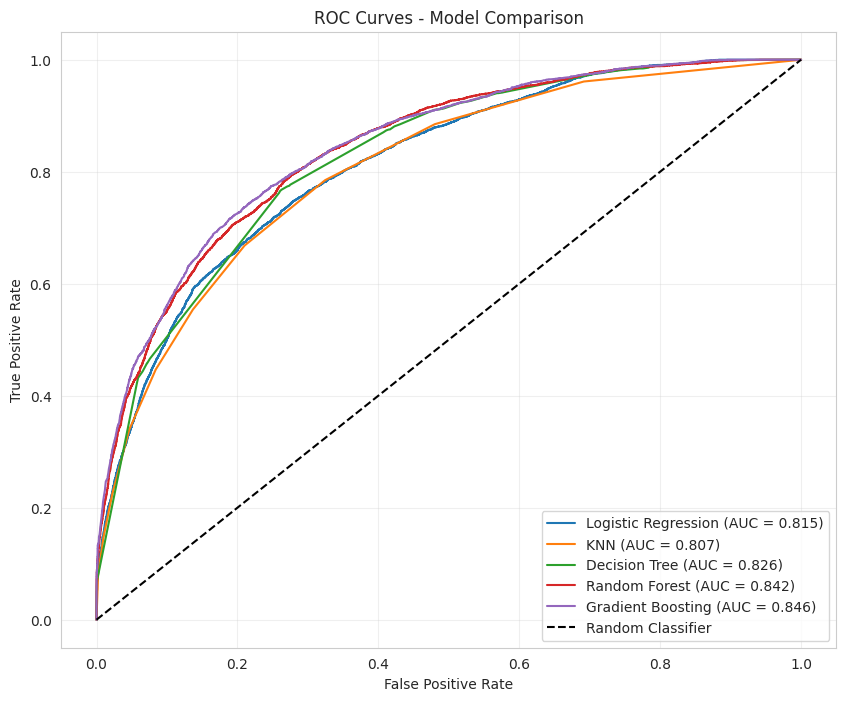

In [74]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

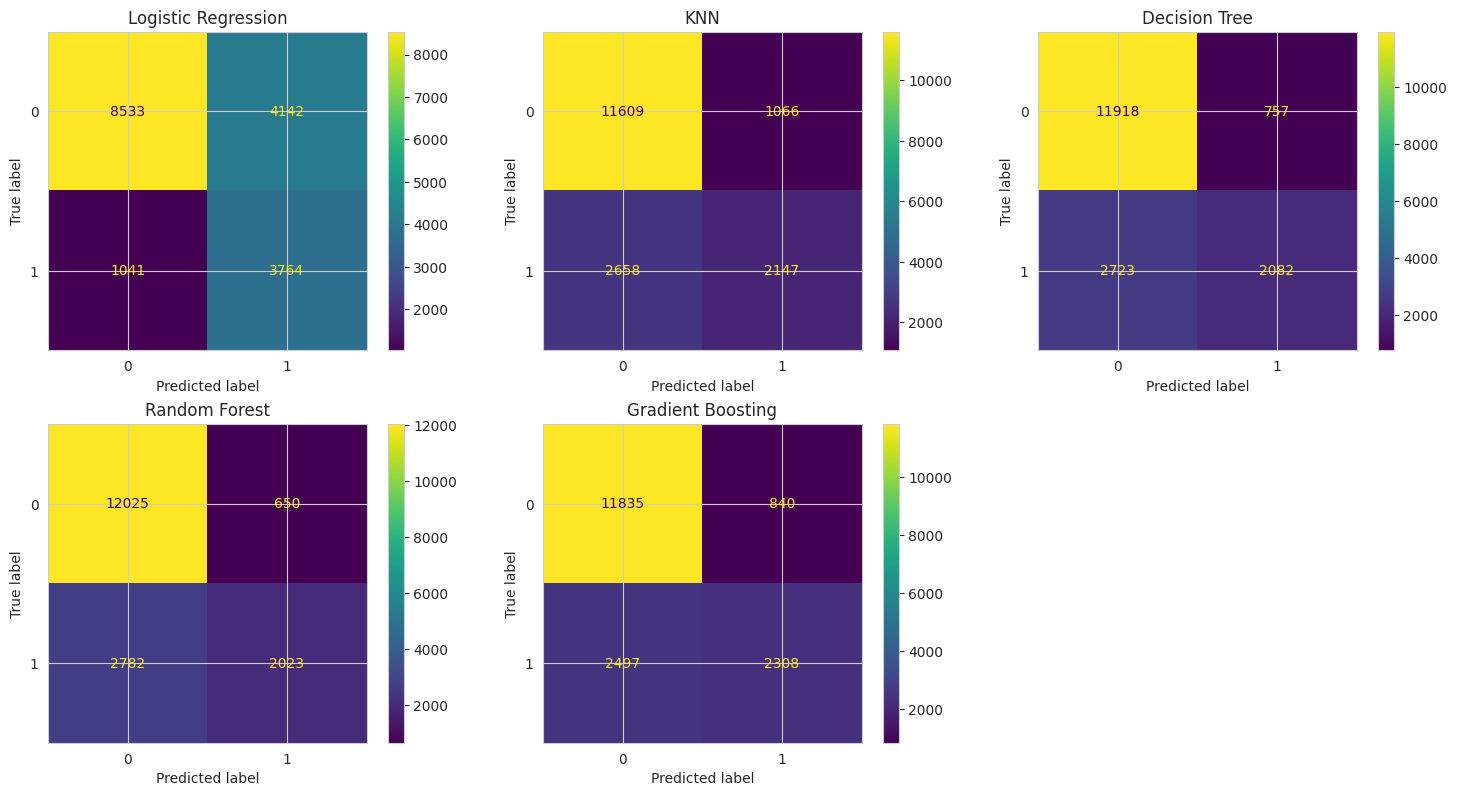

In [107]:
#Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
n_models = len(models)
ncols = 3
nrows = int(np.ceil(n_models / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = np.array(axes).ravel()  # works even if nrows=1

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        ax=axes[idx],
        values_format="d"
    )
    axes[idx].set_title(name)

# Remove empty axes (the unused subplot(s))
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 5. Unsupervised Learning :

In [80]:
#prepare data for clustering

from sklearn.preprocessing import StandardScaler

#keep cancellation labels for interpretation (not for clustering)
copy_new_df=new_df.copy()
cancellation_labels = copy_new_df['is_canceled']

#remove target from features
X_cluster = copy_new_df.drop('is_canceled', axis=1)

#scale features for clustering
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Clustering data shape:", X_cluster_scaled.shape)


Clustering data shape: (87396, 59)


### 5.1 K-Means Clustering

* Determining the optimal number of clusters using 'elbow method' we saw in class

#### WARNING: The running Time can be slow --> That's completely normal

In [119]:
from sklearn.cluster import KMeans
#We use elbow method - find the optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 8)

from sklearn.metrics import silhouette_score

print("Testing different numbers of clusters:")
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_cluster_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans_temp.labels_))
    print(f"  k={k}: Inertia={kmeans_temp.inertia_:.0f}, Silhouette={silhouette_scores[-1]:.3f}")


Testing different numbers of clusters:
  k=2: Inertia=4801053, Silhouette=0.197
  k=3: Inertia=4575555, Silhouette=0.179
  k=4: Inertia=4413107, Silhouette=0.067
  k=5: Inertia=4270691, Silhouette=0.072
  k=6: Inertia=4184263, Silhouette=0.077
  k=7: Inertia=4082912, Silhouette=0.048


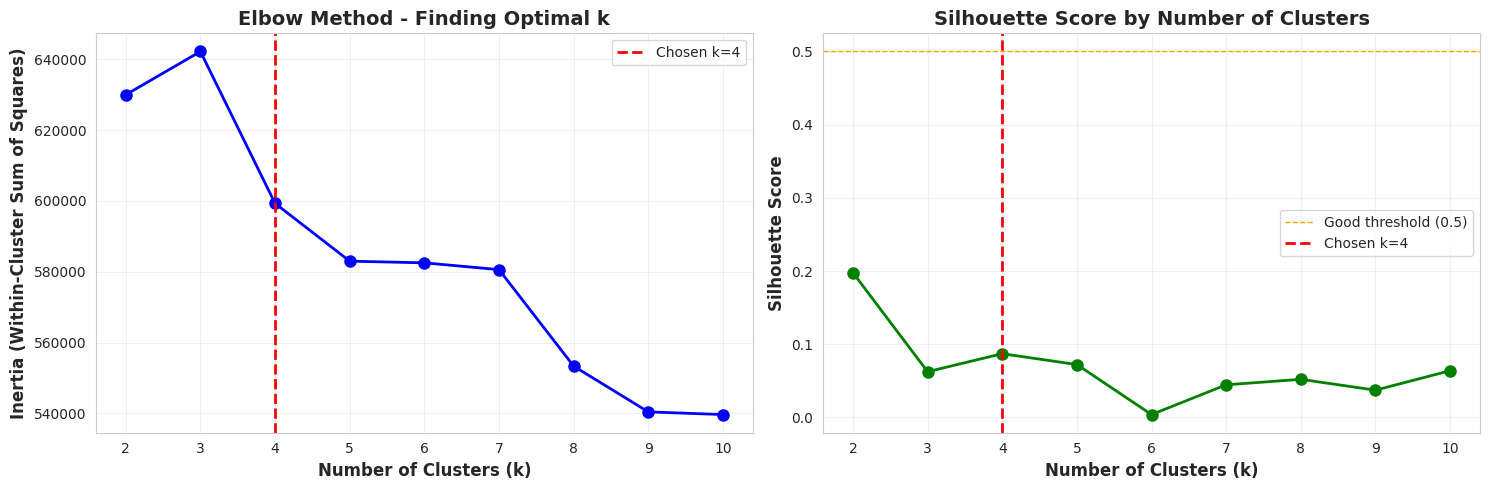

In [102]:
# Elbow curve
# Visualize elbow curve and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method - Finding Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=4, color='red', linestyle='--', label='Chosen k=4', linewidth=2)
axes[0].legend()

# Silhouette scores
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score by Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0.5, color='orange', linestyle='--', label='Good threshold (0.5)', linewidth=1)
axes[1].axvline(x=4, color='red', linestyle='--', label='Chosen k=4', linewidth=2)
axes[1].legend()

plt.tight_layout()
plt.show()


> Elbow at k=4 suggests 4 distinct customer segments

> Silhouette score helps validate cluster quality (higher is better)

So we choose k=4


In [104]:
#We segment customers wth k=4
# Fit K-Means with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
new_df['customer_segment'] = cluster_labels

print(f"Clustering complete!")
print(f"Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_labels):.3f}")
print(f"\nCustomer distribution across segments:")
print(new_df['customer_segment'].value_counts().sort_index())

Clustering complete!
Silhouette Score: 0.067

Customer distribution across segments:
customer_segment
0    35312
1    34218
2     5464
3    12402
Name: count, dtype: int64


In [109]:
#Let's see the cancellation behavior
print("SEGMENT CHARACTERISTICS")


segment_profiles = []

for segment in range(4):
    seg_data = new_df[new_df['customer_segment'] == segment]
    segment_profiles.append({
        'Segment': segment,
        'Size': len(seg_data),
        'Cancel_Rate_%': seg_data['is_canceled'].mean() * 100,
        'Avg_Lead_Days': seg_data['lead_time'].mean(),
        'Avg_Price': seg_data['adr'].mean(),
        'Repeat_Guest_%': seg_data['is_repeated_guest'].mean() * 100,
        'Prev_Cancels': seg_data['previous_cancellations'].mean()
    })

profiles_df = pd.DataFrame(segment_profiles).sort_values('Cancel_Rate_%', ascending=False)
print("\n", profiles_df.to_string(index=False))

SEGMENT CHARACTERISTICS

  Segment  Size  Cancel_Rate_%  Avg_Lead_Days  Avg_Price  Repeat_Guest_%  Prev_Cancels
       0 35312      35.902809      78.545452 120.218024        0.597531      0.012517
       1 34218      25.992168      99.321059  96.238834        1.893740      0.019960
       3 12402      14.916949      48.706821 112.782192        6.289308      0.016691
       2  5464      11.035871      37.693814  65.242670       32.503660      0.242679


In [110]:
# Print segment details

for _, row in profiles_df.iterrows():
    risk = "HIGH RISK" if row['Cancel_Rate_%'] > 40 else "MEDIUM RISK" if row['Cancel_Rate_%'] > 25 else "LOW RISK"
    print(f"\nSEGMENT {int(row['Segment'])}: {risk}")
    print(f"  Size: {int(row['Size']):,} ({row['Size']/len(new_df)*100:.1f}%)")
    print(f"  Cancellation Rate: {row['Cancel_Rate_%']:.1f}%")
    print(f"  Avg Lead Time: {row['Avg_Lead_Days']:.0f} days")
    print(f"  Avg Price: ${row['Avg_Price']:.2f}")



SEGMENT 0: MEDIUM RISK
  Size: 35,312 (40.4%)
  Cancellation Rate: 35.9%
  Avg Lead Time: 79 days
  Avg Price: $120.22

SEGMENT 1: MEDIUM RISK
  Size: 34,218 (39.2%)
  Cancellation Rate: 26.0%
  Avg Lead Time: 99 days
  Avg Price: $96.24

SEGMENT 3: LOW RISK
  Size: 12,402 (14.2%)
  Cancellation Rate: 14.9%
  Avg Lead Time: 49 days
  Avg Price: $112.78

SEGMENT 2: LOW RISK
  Size: 5,464 (6.3%)
  Cancellation Rate: 11.0%
  Avg Lead Time: 38 days
  Avg Price: $65.24


VISUALIZATIONS


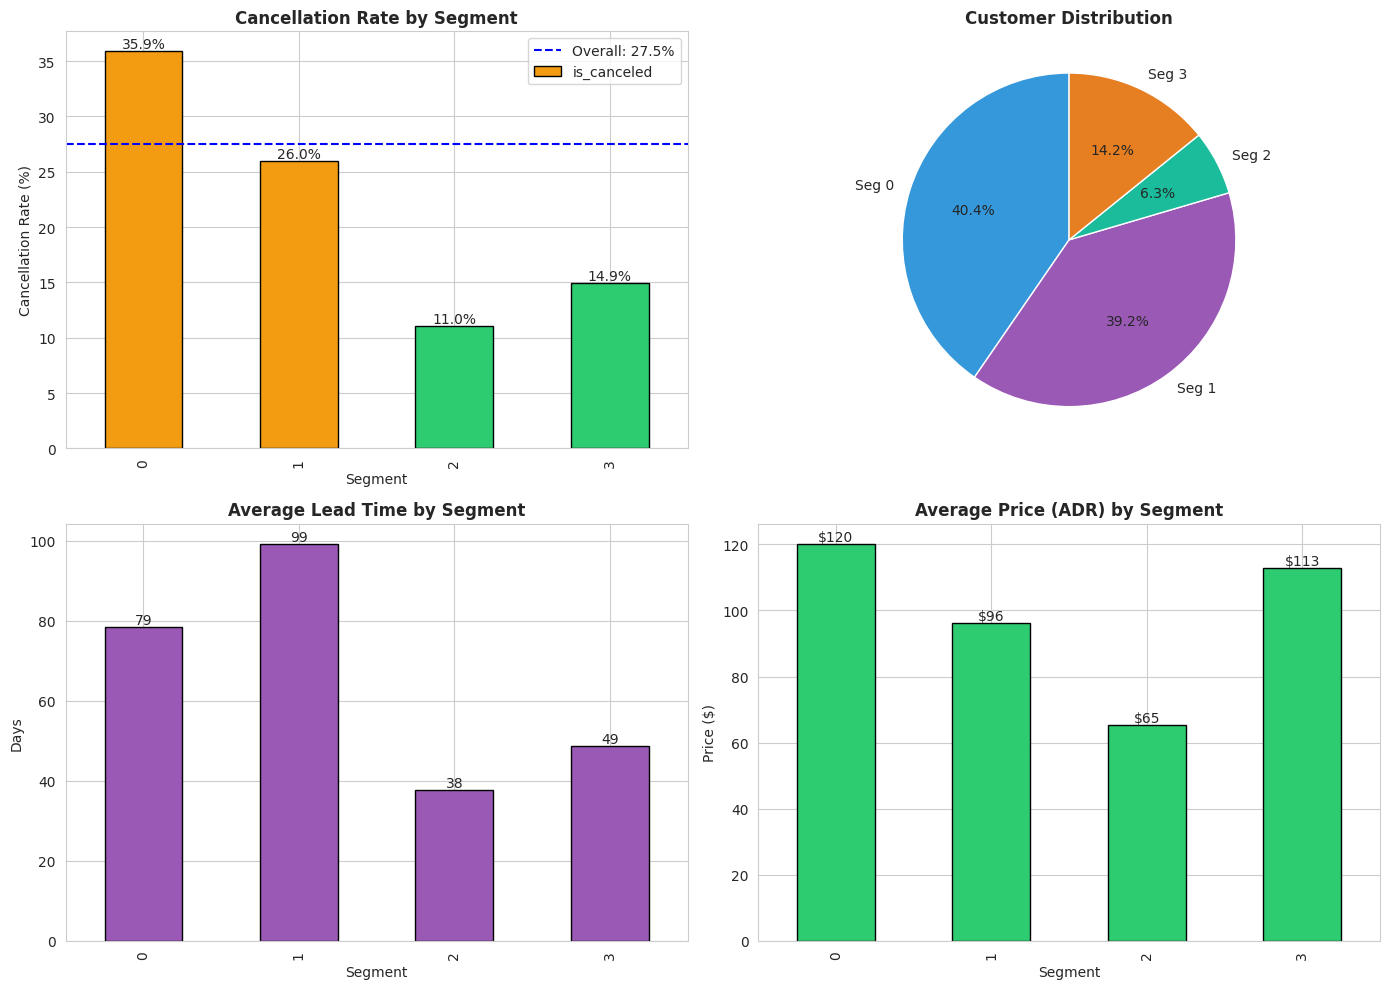

In [111]:
print("VISUALIZATIONS")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cancellation rate by segment
segment_cancel = new_df.groupby('customer_segment')['is_canceled'].mean() * 100
colors = ['#e74c3c' if x > 40 else '#f39c12' if x > 25 else '#2ecc71' for x in segment_cancel.values]
segment_cancel.plot(kind='bar', ax=axes[0, 0], color=colors, edgecolor='black')
axes[0, 0].set_title('Cancellation Rate by Segment', fontweight='bold')
axes[0, 0].set_ylabel('Cancellation Rate (%)')
axes[0, 0].set_xlabel('Segment')
axes[0, 0].axhline(y=new_df['is_canceled'].mean()*100, color='blue', linestyle='--',
                   label=f'Overall: {new_df["is_canceled"].mean()*100:.1f}%')
axes[0, 0].legend()
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.1f%%')

# Segment size
segment_sizes = new_df['customer_segment'].value_counts().sort_index()
axes[0, 1].pie(segment_sizes, labels=[f'Seg {i}' for i in segment_sizes.index],
               autopct='%1.1f%%', colors=['#3498db', '#9b59b6', '#1abc9c', '#e67e22'], startangle=90)
axes[0, 1].set_title('Customer Distribution', fontweight='bold')

# Lead time by segment
new_df.groupby('customer_segment')['lead_time'].mean().plot(kind='bar', ax=axes[1, 0],
                                                              color='#9b59b6', edgecolor='black')
axes[1, 0].set_title('Average Lead Time by Segment', fontweight='bold')
axes[1, 0].set_ylabel('Days')
axes[1, 0].set_xlabel('Segment')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.0f')

# Price by segment
new_df.groupby('customer_segment')['adr'].mean().plot(kind='bar', ax=axes[1, 1],
                                                       color='#2ecc71', edgecolor='black')
axes[1, 1].set_title('Average Price (ADR) by Segment', fontweight='bold')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_xlabel('Segment')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='$%.0f')

plt.tight_layout()
plt.show()


### 5.2 PCA :

Since the K-Means a lot of time, we can do a PCA reduction to visualize

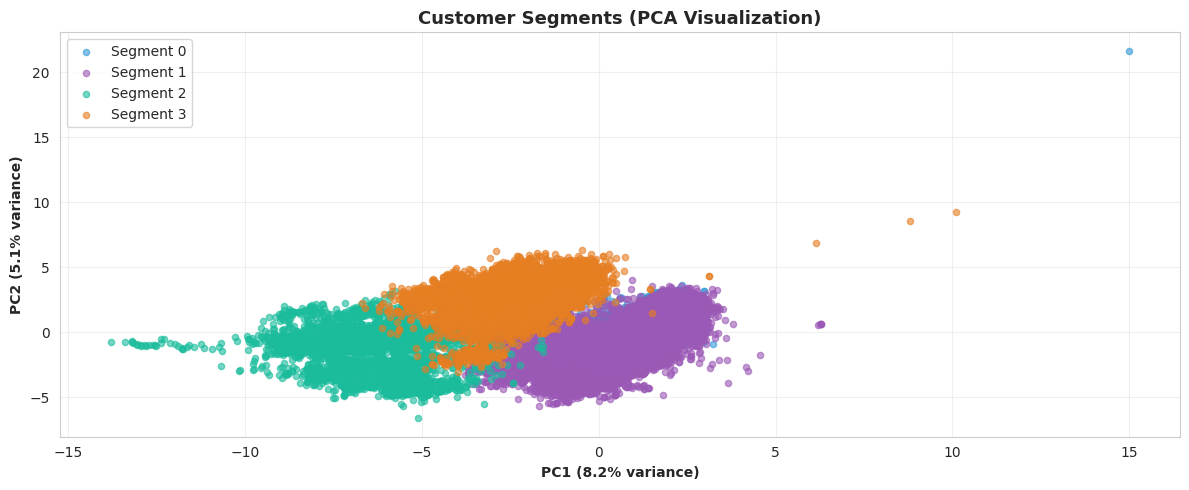

In [112]:
from sklearn.decomposition import PCA
# PCA Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 5))
colors_map = {0: '#3498db', 1: '#9b59b6', 2: '#1abc9c', 3: '#e67e22'}

for segment in range(4):
    mask = cluster_labels == segment
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Segment {segment}',
               alpha=0.6, s=20, color=colors_map[segment])

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontweight='bold')
plt.title('Customer Segments (PCA Visualization)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Business Insights and Recommendations

#### Actionnable Strategies per segment :

* SEGMENT 0 (35.9% cancellation): Send reminders, offer flexible modifications, mild deposit (10-15%)

* SEGMENT 1 (26.0% cancellation): Send reminders, offer flexible modifications, mild deposit (10-15%)

* SEGMENT 3 (14.9% cancellation): Standard process, focus on upselling, loyalty enrollment

* SEGMENT 2 (11.0% cancellation): Standard process, focus on upselling, loyalty enrollment



 24.9% spread between highest and lowest risk segments :  Target high-risk segments to maximize impact of retention efforts